In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_parquet('max_2dconv_noquant_20t.parquet')

In [3]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def pull_plot(df, ax, var, name):
    
    h = ax.hist(df[var],bins=np.linspace(-5,5,50),histtype='step')
    ax.set_xlabel(name)
    ax.set_yscale('log')

    ydata = h[0]
    xdata = h[1][:-1]+0.1

    pars, cov = scipy.optimize.curve_fit(gauss,xdata,ydata)

    xbins = np.linspace(-5,5,100)
    ax.plot(xbins,gauss(xbins,pars[0],pars[1],pars[2]),color='black')
    ax.set_ylim(0.5,100000)

    print('Mean',pars[1])
    print('Sigma',pars[2])
    
    ax.text(-5,2000,r'$\mu$='+str(round(pars[1],2)))
    ax.text(-5,1000,r'$\sigma$='+str(round(abs(pars[2]),2)))

Mean -0.06946868268182374
Sigma 0.9042569856576027
Mean -0.07968101305195223
Sigma -0.8981404583082013
Mean 0.019221813549203822
Sigma 0.9890683237102078
Mean 0.06836850752823313
Sigma 0.9077685261636692


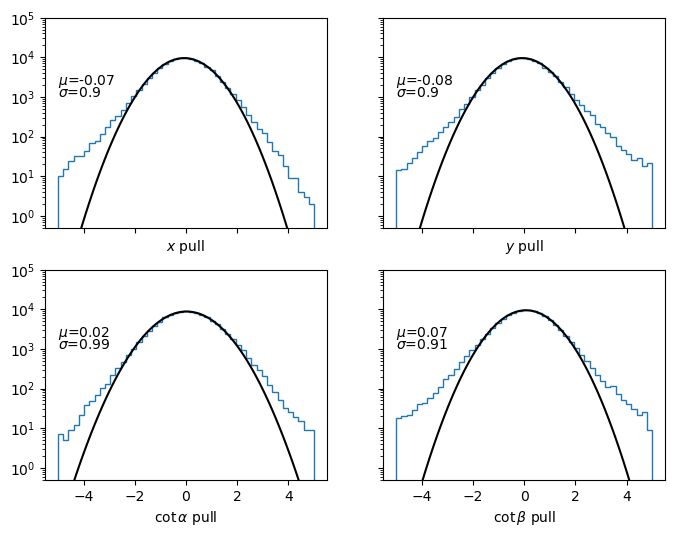

In [4]:
fig, axes = plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,6))
pull_plot(df, axes[0][0],'pullx',r'$x$ pull')
pull_plot(df, axes[0][1],'pully',r'$y$ pull')
pull_plot(df, axes[1][0],'pullcotA',r'$\cot\alpha$ pull')
pull_plot(df, axes[1][1],'pullcotB',r'$\cot\beta$ pull')

#save_fig_path = os.path.join(base_dir, 'Pull.png')
#plt.savefig(save_fig_path)

plt.show()